<a href="https://colab.research.google.com/github/smonodeep/compile/blob/master/Image%20Recognition%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow
from keras import models,layers,optimizers
import pandas as pd
from numpy.random import seed
import h5py

In [0]:
image=load_img('test_01_17052020.jpg')

In [0]:
np_image=np.array(image)

In [6]:
np_image.shape

(122, 218, 3)

In [7]:
np_image

array([[[ 91, 108, 118],
        [ 91, 108, 118],
        [ 91, 108, 118],
        ...,
        [ 37,  55,   7],
        [ 38,  55,  10],
        [ 38,  55,  13]],

       [[ 92, 109, 119],
        [ 92, 109, 119],
        [ 92, 109, 119],
        ...,
        [ 37,  55,   7],
        [ 37,  54,   9],
        [ 37,  54,  12]],

       [[ 92, 109, 119],
        [ 92, 109, 119],
        [ 92, 109, 119],
        ...,
        [ 37,  55,   7],
        [ 36,  53,   8],
        [ 36,  53,  11]],

       ...,

       [[ 38,  31,  23],
        [ 38,  31,  23],
        [ 38,  31,  23],
        ...,
        [113,  76, 107],
        [111,  76, 106],
        [111,  77, 104]],

       [[ 35,  28,  20],
        [ 35,  28,  20],
        [ 36,  29,  21],
        ...,
        [108,  73, 103],
        [107,  72, 102],
        [106,  73, 100]],

       [[ 35,  28,  22],
        [ 35,  28,  22],
        [ 36,  29,  23],
        ...,
        [108,  73, 103],
        [106,  73, 102],
        [106,  73, 100]]

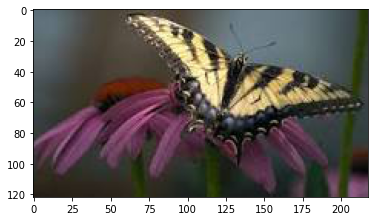

In [8]:
plt.imshow(image)

In [0]:
import h5py
import numpy as np

arr = np.random.randn(1000)

with h5py.File('random.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=arr)

In [10]:
train_dataset=h5py.File('random.hdf5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [11]:
type(train_dataset)

h5py._hl.files.File

In [12]:
train_dataset=h5py.File('train_catvnoncat.h5')
test_dataset=h5py.File('test_catvnoncat.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [13]:
type(train_dataset)

h5py._hl.files.File

In [0]:
train_x=np.array(train_dataset['train_set_x'][:])


In [15]:
train_x.shape

(209, 64, 64, 3)

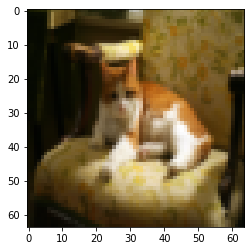

In [16]:
plt.imshow(train_x[7])

In [0]:
train_y=np.array(train_dataset['train_set_y'][:])

In [18]:
train_y[0:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

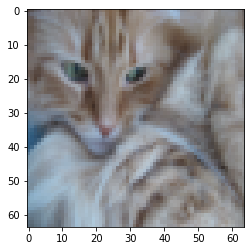

In [19]:
plt.imshow(train_x[2])

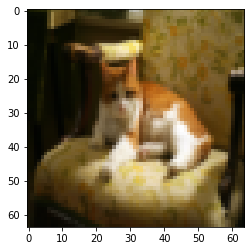

In [20]:
plt.imshow(train_x[7])

In [0]:
test_x=np.array(test_dataset['test_set_x'][:])

In [0]:
test_y=np.array(test_dataset['test_set_y'][:])

In [23]:
test_y[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

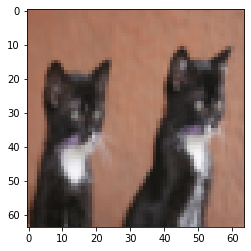

In [24]:
plt.imshow(test_x[0])

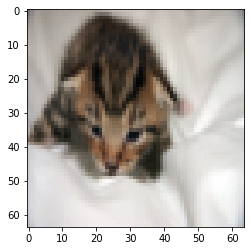

In [25]:
plt.imshow(test_x[1])

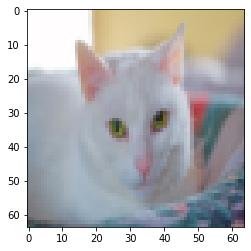

In [26]:
plt.imshow(test_x[2])

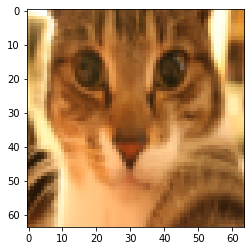

In [27]:
plt.imshow(test_x[3])

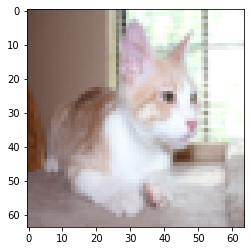

In [28]:
plt.imshow(test_x[4])

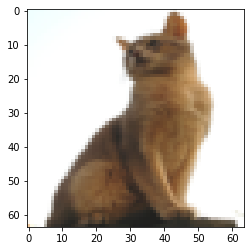

In [29]:
plt.imshow(test_x[6])

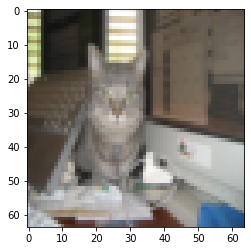

In [30]:
plt.imshow(test_x[7])

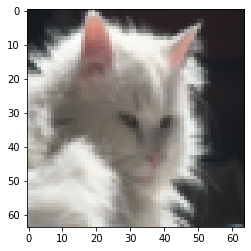

In [31]:
plt.imshow(test_x[8])

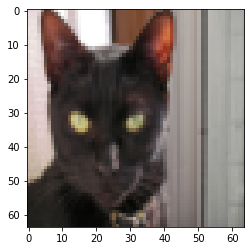

In [32]:
plt.imshow(test_x[9])

In [0]:
train_x=train_x/255
test_x=test_x/255

In [34]:
print('test x shape',test_x.shape)
print('test y shape', test_y.shape)

test x shape (50, 64, 64, 3)
test y shape (50,)


In [0]:
train_x_new=train_x.reshape(train_x.shape[0],-1)

In [36]:
print('train_x shape',train_x.shape)
print('train_x_new shape',train_x_new.shape)

train_x shape (209, 64, 64, 3)
train_x_new shape (209, 12288)


In [0]:
test_x_new=test_x.reshape(test_x.shape[0],-1)

In [38]:
print('test_x shape',test_x.shape)
print('test_x_new shape',test_x_new.shape)

test_x shape (50, 64, 64, 3)
test_x_new shape (50, 12288)


In [39]:
test_x.shape[0]

50

In [0]:
train_y_new=train_y.reshape(train_y.shape[0],-1)
test_y_new=test_y.reshape(test_y.shape[0],-1)

In [41]:
train_y_new.shape,test_y_new.shape

((209, 1), (50, 1))

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)

In [46]:
clf=lr.fit(train_x_new,train_y_new)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
preds=lr.predict(test_x_new)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y_new,preds)

0.72

In [50]:
b

NameError: ignored

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y_new,preds)

0.72

In [68]:
climate_dataset = h5py.File('climo.h5')
images = np.array(climate_dataset['images']) # (1460,16,768,1152) numpy array
#boxes = climate_dataset["boxes"] # (1460,15,5) numpy array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [57]:
type(climate_dataset)

h5py._hl.files.File

In [0]:
climate_1980=np.array(climate_dataset)

In [61]:
climate_1980[0:1]

array([], dtype=float64)

TypeError: ignored

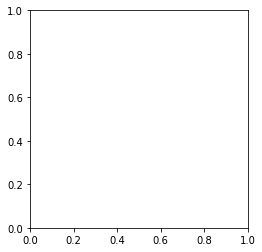

In [62]:
plt.imshow(climate_1980[:1])

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(train_x,test_x),(train_y,test_y)=fashion_mnist.load_data()

In [76]:
(train_x.shape,test_x.shape),(train_y.shape,test_y.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [0]:
classes=np.unique(train_y)
nclasses=len(classes)

In [81]:
classes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

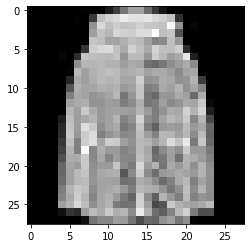

In [88]:
plt.imshow(train_x[255],cmap='gray')

In [91]:
train_x=train_x/255
test_x=test_x/255
train_x.shape, test_x.shape

((60000, 28, 28, 1), (60000,))

In [0]:
from keras.utils import to_categorical